In [76]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import mplcursors
import statsmodels.api as sm
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [5]:
data_CO2 = pd.read_csv("CO2-emissions-by-sector.csv")
data_CH4 = pd.read_csv("CH4-emissions-by-sector.csv")
data_N2O = pd.read_csv("N2O-emissions-by-sector.csv")
data_Fgases = pd.read_csv("Fgases-emissions-by-sector.csv")
data_GHG = pd.read_csv("GHG-emissions-by-sector.csv")

In [6]:
import pandas as pd
import plotly.express as px

fig = px.line(data_CO2, x='Category', y=data_CO2.columns[1:-1])
fig.update_layout(
    title='Emissions CO2 par secteurs',
    legend_title_text='Secteurs',
    legend=dict(
        x=0,  # Position horizontale de la légende (0 signifie à gauche)
        y=-0.2,  # Position verticale de la légende (-0.2 signifie en dessous de l'axe des abscisses)
        orientation='h'  # Orientation horizontale de la légende
    )
)

fig.update_yaxes(title_text='t CO2 / year', title_standoff=30)
fig.update_layout(
    yaxis=dict(
        range=[data_CO2.columns[1:-1].min(), data_CO2.columns[1:-1].max()] 
    )
)

# Activer le curseur interactif
fig.update_traces(hovertemplate='Année: %{x}<br>Émissions: %{y}')

# Afficher le graphique interactif
fig.show()

In [7]:
data_CO2 = data_CO2.rename(columns={'Category':'Year'})
data_CH4 = data_CH4.rename(columns={'Category':'Year'})
data_N2O = data_N2O.rename(columns={'Category':'Year'})
data_Fgases = data_Fgases.rename(columns={'Category':'Year'})
data_GHG = data_GHG.rename(columns={'Category':'Year'})

In [8]:
data_CO2 = data_CO2.rename(columns=lambda col: col + '-CO2' if col != 'Year' else col)
data_CO2.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37


In [9]:
data_CH4 = data_CH4.rename(columns=lambda col: col + '-CH4' if col != 'Year' else col)
data_CH4.head()

,Year,Agriculture-CH4,Buildings-CH4,Fuel Exploitation-CH4,Industrial Combustion-CH4,Power Industry-CH4,Processes-CH4,Transport-CH4,Waste-CH4,Total CH4/cap-CH4
0,1970,3586083162,295562667,2015354707,8580075,1413346,5608009,20344155,1131046316,1.91
1,1971,3647808963,289022899,1991620043,8033084,1450008,5215240,21194747,1188468475,1.89
2,1972,3661879529,291379692,2049742730,8295522,1592332,5756597,22721891,1212408830,1.88
3,1973,3710214427,292896695,2152361604,8588179,1720306,5789461,24199328,1236369926,1.89
4,1974,3763011833,294922505,2121892209,8731193,1803342,5222439,24055041,1255712248,1.87


In [10]:
data_N2O = data_N2O.rename(columns=lambda col: col + '-N2O' if col != 'Year' else col)
data_N2O.head()

,Year,Agriculture-N2O,Buildings-N2O,Fuel Exploitation-N2O,Industrial Combustion-N2O,Power Industry-N2O,Processes-N2O,Transport-N2O,Waste-N2O,Total N2O/cap-N2O
0,1970,891798134,45729181,2973358,12397988,11100270,412890715,34180071,43723239,0.393
1,1971,906794545,45760854,3117505,11584259,11240278,418058877,34791768,44416307,0.391
2,1972,916548531,47350366,3307259,11871221,11853623,429106436,37095585,45069140,0.390
3,1973,928346527,49454995,3716503,12287900,12610785,456801389,39282634,46143266,0.394
4,1974,936495179,49995812,3771094,12354813,12751199,471303599,39576460,46973226,0.393


In [11]:
data_Fgases = data_Fgases.rename(columns=lambda col: col + '-Fgases' if col != 'Year' else col)
data_Fgases.head()

,Year,Processes-Fgases,Total F\x2Dgases/cap-Fgases
0,1970,153335449,0.041
1,1971,162366412,0.043
2,1972,169844001,0.044
3,1973,181366111,0.046
4,1974,192245086,0.048


In [12]:
data_GHG = data_GHG.rename(columns=lambda col: col + '-GHG' if col != 'Year' else col)
data_GHG.head()

,Year,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


# Dataset pour les emissions de gaz à effet de serre dans le monde

In [13]:
all_data_merged = data_CO2.merge(data_CH4, on='Year').merge(data_N2O, on='Year').merge(data_Fgases, on='Year').merge(data_GHG, on='Year')
all_data_merged.head()

,Year,Agriculture-CO2,Buildings-CO2,Fuel Exploitation-CO2,Industrial Combustion-CO2,Power Industry-CO2,Processes-CO2,Transport-CO2,Waste-CO2,Total CO2/cap-CO2,...,Total F\x2Dgases/cap-Fgases,Agriculture-GHG,Buildings-GHG,Fuel Exploitation-GHG,Industrial Combustion-GHG,Power Industry-GHG,Processes-GHG,Transport-GHG,Waste-GHG,Total GHG/cap-GHG
0,1970,49143283,2926458212,1562255701,3744304794,3823699383,915670265,2796286627,7605313,4.28,...,0.041,4527024579,3267750060,3580583766,3765282857,3836212999,1487504437,2850810853,1182374868,6.62
1,1971,49143283,2939568254,1574399637,3511720997,3910981426,921879024,2876504749,7779282,4.18,...,0.043,4603746791,3274352007,3569137184,3531338339,3923671713,1507519552,2932491264,1240664064,6.51
2,1972,49143283,3056870832,1654467714,3602041957,4189105946,990161466,3045881595,7957965,4.31,...,0.044,4627571342,3395600889,3707517703,3622208700,4202551901,1594868499,3105699071,1265435934,6.63
3,1973,49143283,3120449101,1828873474,3788025165,4524711259,1030394452,3221973378,8139190,4.47,...,0.046,4687704237,3462800791,3984951580,3808901244,4539042350,1674351414,3285455339,1290652382,6.81
4,1974,49900345,3040634678,1824605510,3774962595,4603893544,1007746632,3191503489,8320052,4.37,...,0.048,4749407357,3385552994,3950268813,3796048601,4618448085,1676517755,3255134990,1311005526,6.68


In [98]:
data_land_temperatures = pd.read_csv("data_land_temperatures.csv", skiprows=4)
data_land_temperatures

,Year,Anomaly
0,185001,-0.95
1,185002,-0.25
2,185003,-0.47
3,185004,-0.43
4,185005,-0.45
...,...,...
2080,202305,1.19
2081,202306,1.37
2082,202307,1.41
2083,202308,1.66


In [99]:
data_land_temperatures['Year'] = data_land_temperatures['Year'].astype(str)
data_land_temperatures['Month'] = data_land_temperatures['Year'].str.slice(start = -2).astype(int)
data_land_temperatures['Year'] = data_land_temperatures['Year'].str.slice(stop=-2).astype(int)

data_land_temperatures = data_land_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_land_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [100]:
data_land_temperatures

,Year,Month,Anomaly
0,1850,1,-0.95
1,1850,2,-0.25
2,1850,3,-0.47
3,1850,4,-0.43
4,1850,5,-0.45
...,...,...,...
2080,2023,5,1.19
2081,2023,6,1.37
2082,2023,7,1.41
2083,2023,8,1.66


In [101]:
data_land_temperatures['Month'] = data_land_temperatures['Month'].replace({})

In [102]:
data_land_mean_temperatures = data_land_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_land_mean_temperatures = data_land_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_land_mean_temperatures

,Year,averageAnomaly
0,1850,-0.373333
1,1851,-0.246667
2,1852,-0.343333
3,1853,-0.336667
4,1854,-0.265833
...,...,...
169,2019,1.508333
170,2020,1.647500
171,2021,1.371667
172,2022,1.430000


<Axes: xlabel='Year'>

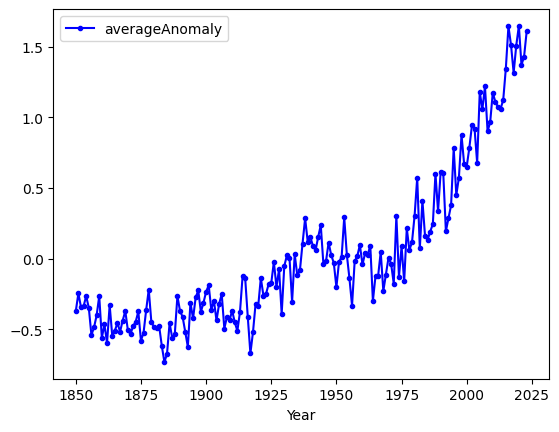

In [103]:
data_land_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [104]:
data_ocean_temperatures = pd.read_csv("data_ocean_temperatures.csv", skiprows=4)
data_ocean_temperatures

,Year,Anomaly
0,185001,-0.10
1,185002,-0.07
2,185003,-0.12
3,185004,-0.08
4,185005,-0.07
...,...,...
2080,202305,0.84
2081,202306,0.92
2082,202307,1.00
2083,202308,1.03


In [105]:
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].astype(str)
data_ocean_temperatures['Month'] = data_ocean_temperatures['Year'].str.slice(start = -2).astype(int)
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].str.slice(stop=-2).astype(int)

data_ocean_temperatures = data_ocean_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_ocean_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [106]:
data_ocean_mean_temperatures = data_ocean_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_ocean_mean_temperatures = data_ocean_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_ocean_mean_temperatures

,Year,averageAnomaly
0,1850,-0.058333
1,1851,0.003333
2,1852,0.027500
3,1853,0.009167
4,1854,-0.016667
...,...,...
169,2019,0.738333
170,2020,0.725000
171,2021,0.630833
172,2022,0.669167


<Axes: xlabel='Year'>

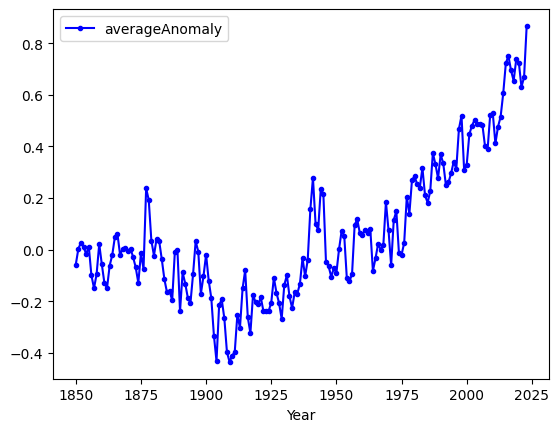

In [107]:
data_ocean_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [108]:
data_global_temperatures = pd.read_csv("global_land_ocean_temperatures.csv", skiprows=4)
data_global_temperatures

,Year,Anomaly
0,185001,-0.37
1,185002,-0.12
2,185003,-0.23
3,185004,-0.19
4,185005,-0.19
...,...,...
2080,202305,0.95
2081,202306,1.06
2082,202307,1.13
2083,202308,1.22


In [109]:
data_global_temperatures['Year'] = data_global_temperatures['Year'].astype(str)
data_global_temperatures['Month'] = data_global_temperatures['Year'].str.slice(start = -2).astype(int)
data_global_temperatures['Year'] = data_global_temperatures['Year'].str.slice(stop=-2).astype(int)

data_global_temperatures = data_global_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_global_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [110]:
data_global_mean_temperatures = data_global_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_global_mean_temperatures = data_global_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_global_mean_temperatures

,Year,averageAnomaly
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833


<Axes: xlabel='Year'>

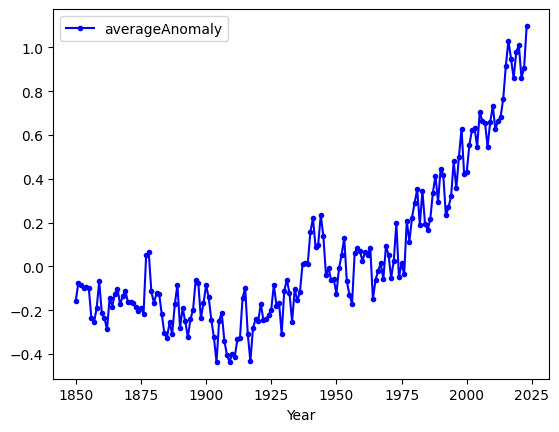

In [111]:
data_global_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [112]:
data_mean_temperatures = data_ocean_mean_temperatures.merge(data_land_mean_temperatures, on="Year", how="inner",suffixes=("-ocean","-land")).merge(data_global_mean_temperatures, on="Year", how="inner").rename(columns={'averageAnomaly':'averageAnomaly-global'})
data_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
0,1850,-0.058333,-0.373333,-0.156667
1,1851,0.003333,-0.246667,-0.074167
2,1852,0.027500,-0.343333,-0.085833
3,1853,0.009167,-0.336667,-0.096667
4,1854,-0.016667,-0.265833,-0.091667
...,...,...,...,...
169,2019,0.738333,1.508333,0.978333
170,2020,0.725000,1.647500,1.010833
171,2021,0.630833,1.371667,0.860000
172,2022,0.669167,1.430000,0.905833


In [113]:
data_mean_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   174 non-null    int64  
 1   averageAnomaly-ocean   174 non-null    float64
 2   averageAnomaly-land    174 non-null    float64
 3   averageAnomaly-global  174 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


In [114]:
data = pd.read_csv("FAOSTAT_data_en_10-21-2023.csv")
data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46729 entries, 0 to 46728
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       46729 non-null  object 
 1   Domain            46729 non-null  object 
 2   Area Code (M49)   46729 non-null  int64  
 3   Area              46729 non-null  object 
 4   Element Code      46729 non-null  int64  
 5   Element           46729 non-null  object 
 6   Item Code         46729 non-null  int64  
 7   Item              46729 non-null  object 
 8   Year Code         46729 non-null  int64  
 9   Year              46729 non-null  int64  
 10  Unit              46729 non-null  object 
 11  Value             46729 non-null  float64
 12  Flag              46729 non-null  object 
 13  Flag Description  46729 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 5.3+ MB


In [32]:
data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1950,1950,1000 No,7480.461,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1950,1950,1000 No,7286.991,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,561,Urban population,3010,Population - Est. & Proj.,1950,1950,1000 No,465.127,X,Figure from international organizations,NaN
3,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,1951,1951,1000 No,7571.537,X,Figure from international organizations,NaN
4,OA,Annual population,4,Afghanistan,551,Rural population,3010,Population - Est. & Proj.,1951,1951,1000 No,7352.856,X,Figure from international organizations,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46724,OA,Annual population,716,Zimbabwe,551,Rural population,3010,Population - Est. & Proj.,2020,2020,1000 No,11980.005,X,Figure from international organizations,NaN
46725,OA,Annual population,716,Zimbabwe,561,Urban population,3010,Population - Est. & Proj.,2020,2020,1000 No,5700.460,X,Figure from international organizations,NaN
46726,OA,Annual population,716,Zimbabwe,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2021,2021,1000 No,15993.524,X,Figure from international organizations,NaN
46727,OA,Annual population,716,Zimbabwe,551,Rural population,3010,Population - Est. & Proj.,2021,2021,1000 No,12226.340,X,Figure from international organizations,NaN


In [33]:
columns_to_drop = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item' ,'Year Code', 'Unit', 'Flag', 'Flag Description', 'Note']
data = data.drop(columns=columns_to_drop)
data

,Area,Element,Year,Value
0,Afghanistan,Total Population - Both sexes,1950,7480.461
1,Afghanistan,Rural population,1950,7286.991
2,Afghanistan,Urban population,1950,465.127
3,Afghanistan,Total Population - Both sexes,1951,7571.537
4,Afghanistan,Rural population,1951,7352.856
...,...,...,...,...
46724,Zimbabwe,Rural population,2020,11980.005
46725,Zimbabwe,Urban population,2020,5700.460
46726,Zimbabwe,Total Population - Both sexes,2021,15993.524
46727,Zimbabwe,Rural population,2021,12226.340


In [34]:
grouped_df_world = data.groupby(['Year', 'Element'], as_index=False).sum()
grouped_df_world = grouped_df_world.drop(columns='Area')

grouped_df_world = grouped_df_world.pivot(index=['Year'], columns='Element', values='Value').reset_index()
grouped_df_world.columns.name = None
grouped_df_world = grouped_df_world.drop(columns='Total Population - Both sexes')
grouped_df_world['Total population'] = grouped_df_world['Urban population'] + grouped_df_world['Rural population']

grouped_df_world

,Year,Rural population,Urban population,Total population
0,1950,2280229.823,820258.014,3100487.837
1,1951,2314969.612,848615.115,3163584.727
2,1952,2346274.223,876864.771,3223138.994
3,1953,2374872.565,905829.315,3280701.880
4,1954,2401878.756,935690.068,3337568.824
...,...,...,...,...
67,2017,4007890.027,4983503.377,8991393.404
68,2018,3996201.638,5083419.009,9079620.647
69,2019,3983886.503,5182643.555,9166530.058
70,2020,3970976.303,5281071.704,9252048.007


In [35]:
data = data.pivot(index=['Area', 'Year'], columns='Element', values='Value').reset_index()

# Réinitialisez les noms de colonnes
data.columns.name = None
data

,Area,Year,Rural population,Total Population - Both sexes,Urban population
0,Afghanistan,1950,7286.991,7480.461,465.127
1,Afghanistan,1951,7352.856,7571.537,486.654
2,Afghanistan,1952,7425.363,7667.533,509.617
3,Afghanistan,1953,7504.561,7764.546,534.035
4,Afghanistan,1954,7590.370,7864.285,560.077
...,...,...,...,...,...
15610,Zimbabwe,2017,11201.138,14751.101,5328.766
15611,Zimbabwe,2018,11465.748,15052.184,5447.513
15612,Zimbabwe,2019,11725.970,15354.608,5571.525
15613,Zimbabwe,2020,11980.005,15669.666,5700.460


In [36]:
data = data.drop(columns=['Total Population - Both sexes'])
data['Total population'] = data['Rural population'] + data['Urban population']
data

,Area,Year,Rural population,Urban population,Total population
0,Afghanistan,1950,7286.991,465.127,7752.118
1,Afghanistan,1951,7352.856,486.654,7839.510
2,Afghanistan,1952,7425.363,509.617,7934.980
3,Afghanistan,1953,7504.561,534.035,8038.596
4,Afghanistan,1954,7590.370,560.077,8150.447
...,...,...,...,...,...
15610,Zimbabwe,2017,11201.138,5328.766,16529.904
15611,Zimbabwe,2018,11465.748,5447.513,16913.261
15612,Zimbabwe,2019,11725.970,5571.525,17297.495
15613,Zimbabwe,2020,11980.005,5700.460,17680.465


In [54]:
# Utilisez la méthode pivot pour remodeler la dataframe
pivot_df = data.pivot(index='Year', columns='Area')

# Réorganisez les colonnes du nouveau dataframe pour avoir le format souhaité
pivot_df = pivot_df.swaplevel(0, 1, axis=1)
pivot_df = pivot_df.sort_index(axis=1, level=0)

# Réinitialisez l'index
pivot_df.reset_index(inplace=True)

# Renommez les colonnes pour correspondre au format souhaité
pivot_df.columns = [f'{col} - {area}' if col != 'Year' else col for col, area in pivot_df.columns]


pivot_df

,Year,Afghanistan - Rural population,Afghanistan - Total population,Afghanistan - Urban population,Albania - Rural population,Albania - Total population,Albania - Urban population,Algeria - Rural population,Algeria - Total population,Algeria - Urban population,...,Yemen - Urban population,Yugoslav SFR - Rural population,Yugoslav SFR - Total population,Yugoslav SFR - Urban population,Zambia - Rural population,Zambia - Total population,Zambia - Urban population,Zimbabwe - Rural population,Zimbabwe - Total population,Zimbabwe - Urban population
0,1950,7286.991,7752.118,465.127,1003.869,1263.174,259.305,6901.437,8872.247,1970.810,...,255.335,13139.354,16366.126,3226.772,2044.741,2310.442,265.701,2454.484,2746.852,292.368
1,1951,7352.856,7839.510,486.654,1010.645,1287.497,276.852,6963.871,9039.910,2076.039,...,271.615,13226.711,16623.076,3396.365,2081.336,2366.628,285.292,2523.363,2829.750,306.387
2,1952,7425.363,7934.980,509.617,1016.436,1316.089,299.653,7028.785,9216.397,2187.612,...,288.875,13302.989,16873.951,3570.962,2121.255,2427.991,306.736,2596.050,2917.368,321.318
3,1953,7504.561,8038.596,534.035,1023.453,1348.099,324.646,7099.006,9405.443,2306.437,...,307.128,13366.038,17115.631,3749.593,2163.527,2493.513,329.986,2671.839,3008.925,337.086
4,1954,7590.370,8150.447,560.077,1030.967,1382.878,351.911,7175.692,9609.505,2433.813,...,326.499,13413.777,17346.245,3932.468,2207.345,2562.483,355.138,2750.213,3103.899,353.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,26558.609,35530.081,8971.472,1190.155,2930.187,1740.032,11547.532,41318.142,29770.610,...,10174.612,NaN,NaN,NaN,9747.709,17094.130,7346.421,11201.138,16529.904,5328.766
68,2018,27099.874,36373.176,9273.302,1164.388,2934.363,1769.975,11498.038,42008.054,30510.016,...,10595.260,NaN,NaN,NaN,9945.501,17609.178,7663.677,11465.748,16913.261,5447.513
69,2019,27626.382,37209.007,9582.625,1139.266,2938.428,1799.162,11442.587,42679.018,31236.431,...,11025.440,NaN,NaN,NaN,10143.883,18137.369,7993.486,11725.970,17297.495,5571.525
70,2020,28150.604,38054.941,9904.337,1114.672,2942.034,1827.362,11382.345,43333.255,31950.910,...,11465.414,NaN,NaN,NaN,10342.892,18679.273,8336.381,11980.005,17680.465,5700.460


## Graphe de l'évolution des populations rurals et urbaines dans le monde

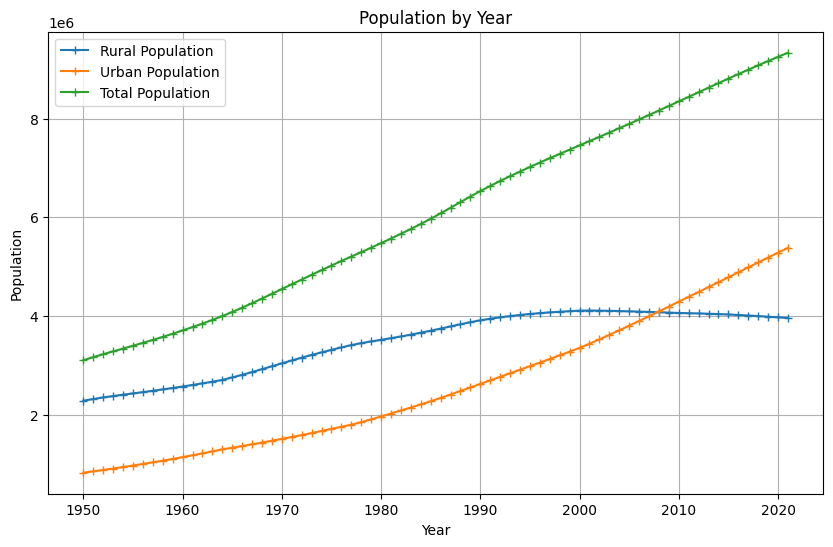

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df_world['Year'], grouped_df_world['Rural population'], marker='+', label='Rural Population')
plt.plot(grouped_df_world['Year'], grouped_df_world['Urban population'], marker='+', label='Urban Population')
plt.plot(grouped_df_world['Year'], grouped_df_world['Total population'], marker='+', label='Total Population')

# Configuration du graphique
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

In [39]:
data_test = pd.read_csv('Emissions_Totals_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
data_test.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Source Code,Source,Unit,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2030,Y2050
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170,1.5337,1.9389
1,2,'004,Afghanistan,5064,Crop Residues,7236,Indirect emissions (N2O),3050,FAO TIER 1,kilotonnes,...,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963,0.3451,0.4362
2,2,'004,Afghanistan,5064,Crop Residues,7230,Emissions (N2O),3050,FAO TIER 1,kilotonnes,...,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133,1.8788,2.3751
3,2,'004,Afghanistan,5064,Crop Residues,724313,Emissions (CO2eq) from N2O (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047
4,2,'004,Afghanistan,5064,Crop Residues,723113,Emissions (CO2eq) (AR5),3050,FAO TIER 1,kilotonnes,...,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284,497.8929,629.4047


In [40]:
data_test = data_test.drop(columns=[col for col in data_test.columns if 'Code' in col])
data_test = data_test.drop(columns=['Unit','Y2030','Y2050'])

In [41]:
data_test.head()

,Area,Item,Element,Source,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),FAO TIER 1,0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),FAO TIER 1,0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),FAO TIER 1,1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),FAO TIER 1,284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [42]:
# On supprime les lignes avec la valeur 'UNFCCC' dans la colonne 'Source'
data_test = data_test[data_test['Source'] != 'UNFCCC'].drop(columns=['Source'])

In [43]:
data_test.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),0.8762,0.8829,0.8236,0.8882,0.8978,0.8466,0.8783,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),0.1972,0.1987,0.1853,0.1998,0.2020,0.1905,0.1976,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),1.0734,1.0816,1.0089,1.0880,1.0998,1.0371,1.0759,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),284.4486,286.6192,267.3466,288.3212,291.4406,274.8304,285.1026,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284


In [62]:
melted_data = pd.melt(data_test, id_vars=['Area', 'Item', 'Element'], var_name='Year', value_name='Emissions')
melted_data['Category'] = melted_data[['Item', 'Element', 'Area']].apply(lambda x: ' - '.join(x), axis=1)
melted_data = melted_data.drop(columns=['Area','Item','Element'])

# L'unité des émissions est le kilotonnes, on le transforme en kilogrammes.
melted_data['Emissions'] = melted_data['Emissions'] * 1000000
melted_data['Year'] = melted_data['Year'].str.extract('(\d+)').astype(int)


<>:7: SyntaxWarning:

invalid escape sequence '\d'

<>:7: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/_l/lhtp66nj7svcrhfs4v0zky1m0000gn/T/ipykernel_1220/1146098379.py:7: SyntaxWarning:

invalid escape sequence '\d'



In [63]:
melted_data

,Year,Emissions,Category
0,1961,8.762000e+05,Crop Residues - Direct emissions (N2O) - Afgha...
1,1961,1.972000e+05,Crop Residues - Indirect emissions (N2O) - Afg...
2,1961,1.073400e+06,Crop Residues - Emissions (N2O) - Afghanistan
3,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) from N2O (AR...
4,1961,2.844486e+08,Crop Residues - Emissions (CO2eq) (AR5) - Afgh...
...,...,...,...
3231175,2020,1.088919e+13,All sectors without LULUCF - Emissions (CO2) -...
3231176,2020,9.208261e+11,All sectors without LULUCF - Emissions (CO2eq)...
3231177,2020,1.825476e+12,All sectors without LULUCF - Emissions (CO2eq)...
3231178,2020,8.009744e+11,All sectors without LULUCF - Emissions (CO2eq)...


In [64]:
# Utilisez la méthode pivot pour obtenir la table pivot
pivot_table = melted_data.pivot(index='Year', columns='Category', values='Emissions')

# Réinitialisez l'index et donnez un nom à l'index et aux colonnes
pivot_table.reset_index(inplace=True)
pivot_table.columns.name = None

In [66]:
pivot_table.head()

,Year,AFOLU - Emissions (CH4) - Afghanistan,AFOLU - Emissions (CH4) - Africa,AFOLU - Emissions (CH4) - Albania,AFOLU - Emissions (CH4) - Algeria,AFOLU - Emissions (CH4) - American Samoa,AFOLU - Emissions (CH4) - Americas,AFOLU - Emissions (CH4) - Andorra,AFOLU - Emissions (CH4) - Angola,AFOLU - Emissions (CH4) - Anguilla,...,Waste - Emissions (N2O) - Venezuela (Bolivarian Republic of),Waste - Emissions (N2O) - Viet Nam,Waste - Emissions (N2O) - Western Africa,Waste - Emissions (N2O) - Western Asia,Waste - Emissions (N2O) - Western Europe,Waste - Emissions (N2O) - World,Waste - Emissions (N2O) - Yemen,Waste - Emissions (N2O) - Yugoslav SFR,Waste - Emissions (N2O) - Zambia,Waste - Emissions (N2O) - Zimbabwe
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On ne récupère que les valeurs pour la zone géographique "World" (Monde)

In [67]:
pivot_table_world = pivot_table[[col for col in pivot_table.columns if 'World' in col or 'Year' in col]]
print(f"Nombre de valeurs manquantes : {pivot_table_world.isna().sum().sum()}")

Nombre de valeurs manquantes : 5249


In [79]:
pivot_table_world

,Year,AFOLU - Emissions (CH4) - World,AFOLU - Emissions (CO2) - World,AFOLU - Emissions (CO2eq) (AR5) - World,AFOLU - Emissions (CO2eq) from CH4 (AR5) - World,AFOLU - Emissions (CO2eq) from N2O (AR5) - World,AFOLU - Emissions (N2O) - World,Agricultural Soils - Direct emissions (N2O) - World,Agricultural Soils - Emissions (CO2eq) (AR5) - World,Agricultural Soils - Emissions (CO2eq) from N2O (AR5) - World,...,Synthetic Fertilizers - Emissions (CO2eq) (AR5) - World,Synthetic Fertilizers - Emissions (CO2eq) from N2O (AR5) - World,Synthetic Fertilizers - Emissions (N2O) - World,Synthetic Fertilizers - Indirect emissions (N2O) - World,Waste - Emissions (CH4) - World,Waste - Emissions (CO2) - World,Waste - Emissions (CO2eq) (AR5) - World,Waste - Emissions (CO2eq) from CH4 (AR5) - World,Waste - Emissions (CO2eq) from N2O (AR5) - World,Waste - Emissions (N2O) - World
0,1961,NaN,NaN,NaN,NaN,NaN,NaN,1.842093e+09,6.337327e+11,6.337327e+11,...,6.320945e+10,6.320945e+10,2.385262e+08,58506400.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1962,NaN,NaN,NaN,NaN,NaN,NaN,1.898113e+09,6.529806e+11,6.529806e+11,...,7.133256e+10,7.133256e+10,2.691795e+08,66025200.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1963,NaN,NaN,NaN,NaN,NaN,NaN,1.944163e+09,6.688706e+11,6.688706e+11,...,8.053092e+10,8.053092e+10,3.038903e+08,74539100.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1964,NaN,NaN,NaN,NaN,NaN,NaN,2.006306e+09,6.898036e+11,6.898036e+11,...,9.024583e+10,9.024583e+10,3.405503e+08,83531200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1965,NaN,NaN,NaN,NaN,NaN,NaN,2.078881e+09,7.149625e+11,7.149625e+11,...,1.040795e+11,1.040795e+11,3.927527e+08,96335600.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1966,NaN,NaN,NaN,NaN,NaN,NaN,2.171806e+09,7.468719e+11,7.468719e+11,...,1.211145e+11,1.211145e+11,4.570359e+08,112103100.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1967,NaN,NaN,NaN,NaN,NaN,NaN,2.246194e+09,7.725187e+11,7.725187e+11,...,1.321892e+11,1.321892e+11,4.988272e+08,122353800.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1968,NaN,NaN,NaN,NaN,NaN,NaN,2.317671e+09,7.970134e+11,7.970134e+11,...,1.444578e+11,1.444578e+11,5.451237e+08,133709600.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1969,NaN,NaN,NaN,NaN,NaN,NaN,2.364691e+09,8.132686e+11,8.132686e+11,...,1.561468e+11,1.561468e+11,5.892332e+08,144528900.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1970,NaN,NaN,NaN,NaN,NaN,NaN,2.435059e+09,8.374557e+11,8.374557e+11,...,1.740685e+11,1.740685e+11,6.568623e+08,161117200.0,NaN,NaN,NaN,NaN,NaN,NaN


### Remplissage des valeurs manquantes avec une méthode d'imputation de la librairie python de Sklearn

In [81]:
imputer = IterativeImputer()

imputer.fit(pivot_table_world.iloc[:,1:])
pivot_table_world_imputed = imputer.transform(pivot_table_world.iloc[:,1:])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [82]:
pivot_table_world_imputed

array([[1.07052069e+11, 1.44370468e+12, 5.13080723e+12, ...,
        2.14973504e+12, 4.41330663e+10, 2.17538893e+08],
       [1.08575163e+11, 1.43380262e+12, 5.18560298e+12, ...,
        2.14205331e+12, 4.41096139e+10, 2.18109032e+08],
       [1.09209516e+11, 1.42931540e+12, 5.21627352e+12, ...,
        2.13614008e+12, 4.41024253e+10, 2.19367537e+08],
       ...,
       [1.45545360e+11, 1.29492871e+12, 7.47882320e+12, ...,
        2.26503449e+12, 1.11074058e+11, 4.19147400e+08],
       [1.48220712e+11, 1.47172785e+12, 7.75360933e+12, ...,
        2.28957115e+12, 1.13733159e+11, 4.29181700e+08],
       [1.45836875e+11, 1.17268851e+12, 7.42510774e+12, ...,
        2.31920575e+12, 1.15421436e+11, 4.35552600e+08]])

## 4 - Régression dynamique

### Premier modèle de régression dynamique pour prédire les températures globales avec les données éxogènes ocean et land pour les températures

In [49]:
# Fit the model
data_mean_temperatures_2010 = data_mean_temperatures[data_mean_temperatures['Year']<2010]
endog = data_mean_temperatures_2010['averageAnomaly-global']
exog = sm.add_constant(data_mean_temperatures_2010[['averageAnomaly-ocean','averageAnomaly-land']])
exog['averageAnomaly-ocean2'] = data_mean_temperatures_2010['averageAnomaly-ocean']**2
exog['averageAnomaly-land2'] = data_mean_temperatures_2010['averageAnomaly-land']**2
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,3), seasonal_order=(1,0,1,7))
res = mod.fit(disp=False)
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:               averageAnomaly-global   No. Observations:                  160
Model:             SARIMAX(1, 0, 3)x(1, 0, [1], 7)   Log Likelihood                 881.274
Date:                             Sun, 05 Nov 2023   AIC                          -1738.548
Time:                                     16:59:24   BIC                          -1701.646
Sample:                                          0   HQIC                         -1723.563
                                             - 160                                         
Covariance Type:                               opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.395e-05      0.000      0.188      0.851      -0.000       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [50]:
# Créez une liste de combinaisons de paramètres à essayer
# Vous pouvez spécifier une plage de valeurs pour p, d, q, P, D, Q, et s
p_values = [1, 2, 3]
d_values = [0, 1]
q_values = [1, 2, 3]
P_values = [1, 2]
D_values = [0, 1]
Q_values = [1, 2]
s_values = [7]  # Saison

best_aic = float("inf")
best_order = ()
best_seasonal_order = ()
best_model = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            try:
                                mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(p, d, q), seasonal_order=(P, D, Q, s))
                                res = mod.fit(disp=False)
                                aic = res.aic
                                if aic < best_aic:
                                    best_aic = aic
                                    best_order = (p, d, q)
                                    best_seasonal_order = (P, D, Q, s)
                                    best_model = res
                            except Exception as e:
                                continue

print(f"Best AIC: {best_aic}")
print(f"Best order: {best_order}")
print(f"Best seasonal order: {best_seasonal_order}")

# Le meilleur modèle est stocké dans best_model et peut être utilisé pour les prévisions.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Chec

Best AIC: -1742.670244000777
Best order: (1, 0, 1)
Best seasonal order: (1, 0, 1, 7)


In [51]:
np.sum(np.abs(res.resid.values)**2)

0.00036703629961171104

In [52]:



data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>=2010]
date_index = data_mean_temperatures_prediction['Year']


exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2','averageAnomaly-land','averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [53]:
# Supposons que vous ayez déjà ajusté le modèle SARIMAX comme vous l'avez décrit dans votre code précédent.

# Préparez vos données futures (exogènes) pour les années 2010 à 2023
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

# Utilisez le modèle pour effectuer des prévisions sur ces données futures
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

# Vous avez maintenant un DataFrame "forecast_df" contenant les prévisions de températures globales pour les années 2010 à 2023.


MissingDataError: exog contains inf or nans

In [ ]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year'] >= 2010]

date_index = data_mean_temperatures_prediction['Year']

exog_future = pd.DataFrame(index=date_index, columns=['const', 'averageAnomaly-ocean', 'averageAnomaly-ocean2', 'averageAnomaly-land', 'averageAnomaly-land2'])
exog_future['const'] = 1
exog_future['averageAnomaly-ocean'] = data_mean_temperatures_prediction['averageAnomaly-ocean']
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land'] = data_mean_temperatures_prediction['averageAnomaly-land']
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

data_mean_temperatures_prediction


,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
160,2010,0.528333,1.175833,0.730833
161,2011,0.411667,1.107500,0.627500
162,2012,0.476667,1.075000,0.662500
163,2013,0.515000,1.061667,0.683333
164,2014,0.605833,1.123333,0.765000
165,2015,0.722500,1.345000,0.915000
166,2016,0.751667,1.645833,1.030833
167,2017,0.695000,1.510833,0.947500
168,2018,0.655000,1.315000,0.859167
169,2019,0.738333,1.508333,0.978333


In [ ]:
data_mean_temperatures_prediction = data_mean_temperatures[data_mean_temperatures['Year']>2009]
endog_future = data_mean_temperatures_prediction['averageAnomaly-global']
exog_future = sm.add_constant(data_mean_temperatures_prediction[['averageAnomaly-ocean','averageAnomaly-land']])
exog_future['averageAnomaly-ocean2'] = data_mean_temperatures_prediction['averageAnomaly-ocean']**2
exog_future['averageAnomaly-land2'] = data_mean_temperatures_prediction['averageAnomaly-land']**2

In [ ]:
exog_future

,const,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-ocean2,averageAnomaly-land2
160,1.0,0.528333,1.175833,0.279136,1.382584
161,1.0,0.411667,1.107500,0.169469,1.226556
162,1.0,0.476667,1.075000,0.227211,1.155625
163,1.0,0.515000,1.061667,0.265225,1.127136
164,1.0,0.605833,1.123333,0.367034,1.261878
165,1.0,0.722500,1.345000,0.522006,1.809025
166,1.0,0.751667,1.645833,0.565003,2.708767
167,1.0,0.695000,1.510833,0.483025,2.282617
168,1.0,0.655000,1.315000,0.429025,1.729225
169,1.0,0.738333,1.508333,0.545136,2.275069


In [ ]:
forecast = res.get_forecast(steps=14, exog=exog_future)

# Les prévisions sont stockées dans l'objet "forecast". Vous pouvez extraire les prévisions et les intervalles de confiance ainsi :
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Vous pouvez ensuite créer un DataFrame pour stocker les prévisions, les dates et les intervalles de confiance, par exemple.
forecast_df = pd.DataFrame({
    'Date': date_index,
    'Forecast': forecast_mean,
    'Lower_CI': forecast_ci['lower averageAnomaly-global'],
    'Upper_CI': forecast_ci['upper averageAnomaly-global']
})

In [ ]:
forecast_df

,Date,Forecast,Lower_CI,Upper_CI
160,2010,0.729526,0.727609,0.731443
161,2011,0.627977,0.626060,0.629895
162,2012,0.662547,0.660629,0.664465
163,2013,0.684716,0.682797,0.686634
164,2014,0.766272,0.764354,0.768191
165,2015,0.915446,0.913528,0.917365
166,2016,1.029448,1.027530,1.031367
167,2017,0.948391,0.946470,0.950312
168,2018,0.859812,0.857891,0.861733
169,2019,0.977278,0.975357,0.979199


<Axes: xlabel='Date'>

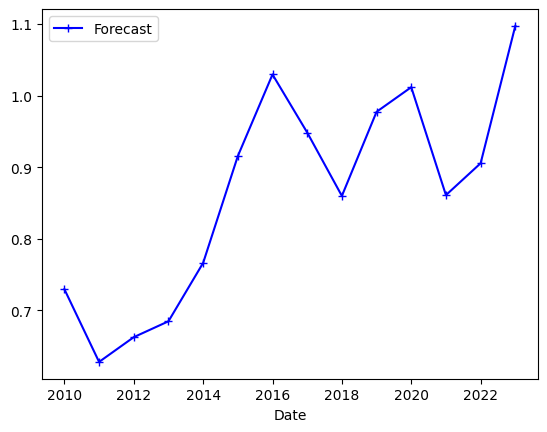

In [ ]:
forecast_df.plot(x='Date', y='Forecast', kind='line', marker='+', linestyle='-', color='b')

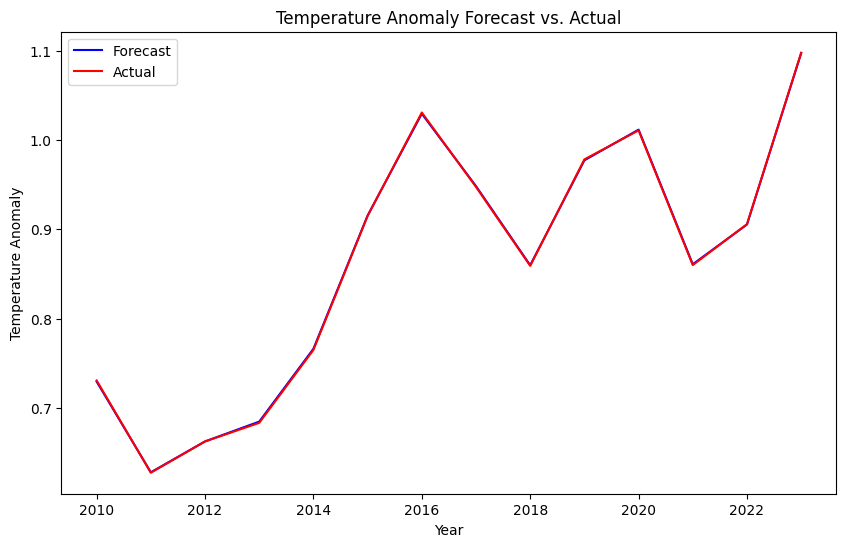

In [ ]:
forecast_dates = forecast_df['Date']
forecast_values = forecast_df['Forecast']
actual_dates = data_mean_temperatures[data_mean_temperatures['Year']>2009]['Year']
actual_values = data_mean_temperatures[data_mean_temperatures['Year']>2009]['averageAnomaly-global']

# Créez un graphique pour superposer les deux séries temporelles
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast_values, label='Forecast', color='blue')
plt.plot(actual_dates, actual_values, label='Actual', color='red')

# Ajoutez des étiquettes, une légende, un titre, etc.
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Forecast vs. Actual')
plt.legend()

# Affichez le graphique
plt.show()

# ARIMA sur les données de température global

In [121]:
data_model_ARIMA = data_mean_temperatures[['Year','averageAnomaly-global']]

In [123]:
data_model_ARIMA['Year'] = pd.to_numeric(data_model_ARIMA['Year'], errors='coerce')

# Transformez la colonne "Year" en un index de type PeriodIndex (annuel)
data_model_ARIMA['Year'] = pd.to_datetime(data_model_ARIMA['Year'], format='%Y')

# Définissez la colonne "Year" comme l'index de la DataFrame
data_model_ARIMA = data_model_ARIMA.set_index('Year')

data_model_ARIMA

/var/folders/_l/lhtp66nj7svcrhfs4v0zky1m0000gn/T/ipykernel_1220/660232383.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_l/lhtp66nj7svcrhfs4v0zky1m0000gn/T/ipykernel_1220/660232383.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,averageAnomaly-global
Year,
1850-01-01,-0.156667
1851-01-01,-0.074167
1852-01-01,-0.085833
1853-01-01,-0.096667
1854-01-01,-0.091667
...,...
2019-01-01,0.978333
2020-01-01,1.010833
2021-01-01,0.860000


In [126]:
# Supprimez le nom de l'index
data_model_ARIMA.index.name = None

# Convertissez l'index en un DatetimeIndex avec le dernier jour de chaque mois
data_model_ARIMA.index = pd.to_datetime(data_model_ARIMA.index, format='%Y-%m-%d')
data_model_ARIMA


,averageAnomaly-global
1850-01-01,-0.156667
1851-01-01,-0.074167
1852-01-01,-0.085833
1853-01-01,-0.096667
1854-01-01,-0.091667
...,...
2019-01-01,0.978333
2020-01-01,1.010833
2021-01-01,0.860000
2022-01-01,0.905833


In [127]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose
out = seasonal_decompose(data_model_ARIMA)

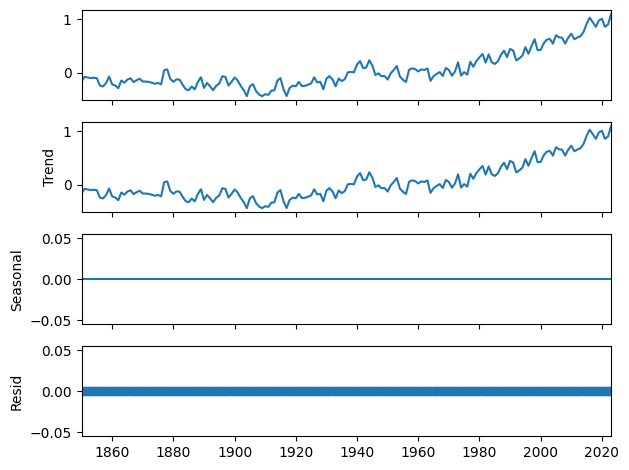

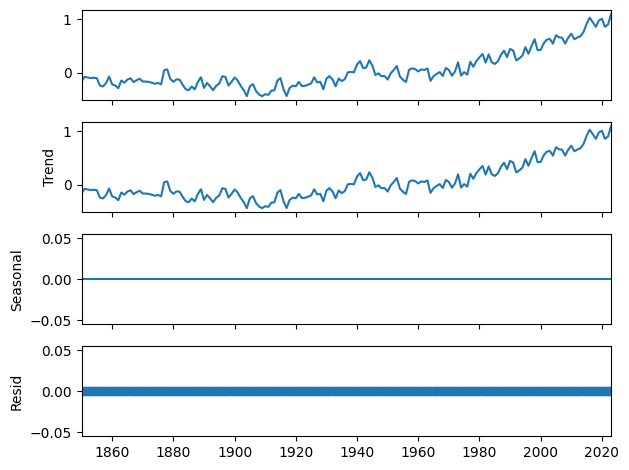

In [128]:
out.plot()

<Axes: >

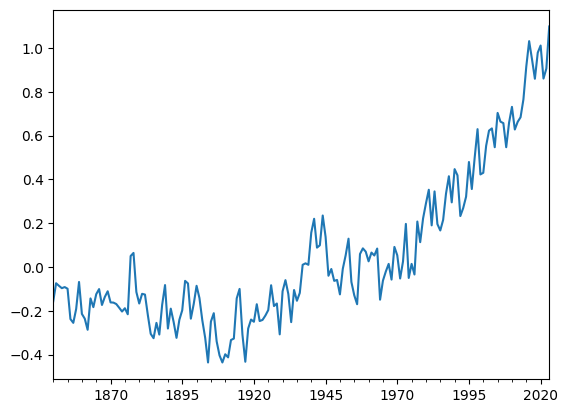

In [129]:
x =  out.observed - out.seasonal
x.plot()

In [130]:
from statsmodels.tsa.stattools import adfuller, kpss

adf, pa, *_  = adfuller(x.dropna())
print("p-value adf : ", pa)


xd =  x.diff(1)
adf, pa, *_  = adfuller(xd.dropna())
print("p-value adf : ", pa)

p-value adf :  0.997651554053703
p-value adf :  1.5302564777124872e-12


Le test de stationnarité de Dickey-Fuller augmentée suggère que les données ne sont pas stationnaires. Or, pour le modèle ARIMA, il est souhaitable d'avoir des données stationnaires. Ainsi il est utile de faire une différenciation, pour rendre les données stationnaires!

LA nouvelle p-value en sortie après la différenciation est faible, les données semblent être stationnaires. On peut procéder à la modélisation ARIMA.

<Axes: >

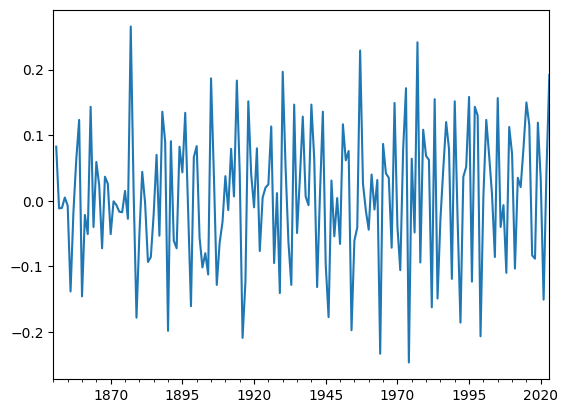

In [131]:
xd.plot()

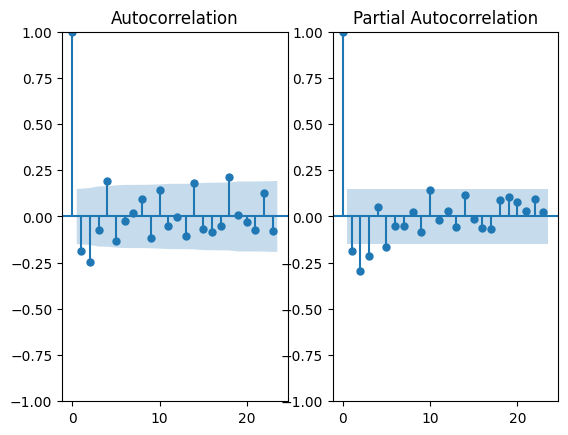

In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2)
plot_acf(xd.dropna(), ax=ax[0]) 
plot_pacf(xd.dropna(), ax=ax[1]);

On voit trois pics significatifs sur la pacf. On peut intuiter un AR(3), qui engendredrait des pics également dans l'autocorrélation. On débutera alors par un ARIMA(3,2,0). 

On pourrait aussi intuiter un AR(2)

In [137]:
from statsmodels.tsa.arima.model import ARIMA 

mod = ARIMA(x, order=(3,1,0))
res = mod.fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 162.907
Date:                Mon, 06 Nov 2023   AIC                           -317.814
Time:                        15:32:19   BIC                           -305.200
Sample:                    01-01-1850   HQIC                          -312.697
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3000      0.076     -3.924      0.000      -0.450      -0.150
ar.L2         -0.3434      0.076     -4.519      0.000      -0.492      -0.194
ar.L3         -0.2068      0.074     -2.812      0.005      -0.351      -0.063
sigma2         0.0089      0.001      8.094      0.000       0.007       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.95
Prob(Q):                              0.98   Prob(JB):                         0.38
Heteroskedasticity (H):               1.55   Skew:                             0.05
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
res.aicc

-317.57553783575423

In [144]:
from statsmodels.tsa.arima.model import ARIMA 

mod = ARIMA(x, order=(2,1,0))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  174
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 159.177
Date:                Mon, 06 Nov 2023   AIC                           -312.354
Time:                        15:42:15   BIC                           -302.894
Sample:                    01-01-1850   HQIC                          -308.516
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2416      0.080     -3.035      0.002      -0.398      -0.086
ar.L2         -0.2931      0.076     -3.876      0.000      -0.441      -0.145
sigma2         0.0093      0.001      8.186      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 1.66
Prob(Q):                              0.34   Prob(JB):                         0.44
Heteroskedasticity (H):               1.54   Skew:                             0.07
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [145]:
res.aicc

-312.211837253936

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
for p in [1,2,3,4,5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            mod = ARIMA(x, order=(p,d,q))
            res = mod.fit()
            print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, res.aicc))

p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [149]:
best_aicc = float('inf')
best_p, best_d, best_q = None, None, None

for p in [1, 2, 3, 4, 5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            try:
                mod = ARIMA(x, order=(p, d, q))
                res = mod.fit()
                aicc = res.aicc
                print("p={}, d={}, q={} --> AICc = {}".format(p, d, q, aicc))
                
                if aicc < best_aicc:
                    best_aicc = aicc
                    best_p, best_d, best_q = p, d, q
            except:
                continue

print("Meilleure combinaison : p={}, d={}, q={} avec AICc = {}".format(best_p, best_d, best_q, best_aicc))


p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [150]:
mod = ARIMA(x, order=(3,1,1))
res = mod.fit()

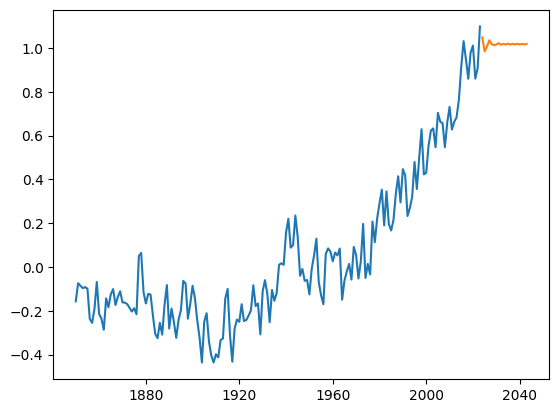

In [151]:
plt.plot(x)
plt.plot(res.forecast(20))

,Year,averageAnomaly-global
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833
